In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
plt.rcParams["figure.figsize"] = (12,6)

In [5]:
birds_url = "../data/birds.csv"
birds = pd.read_csv(birds_url)

In [6]:
birds.head()

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
0,Black-bellied whistling-duck,Dendrocygna autumnalis,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,47.0,56.0,652.0,1020.0,76.0,94.0
1,Fulvous whistling-duck,Dendrocygna bicolor,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Dendrocygna,LC,45.0,53.0,712.0,1050.0,85.0,93.0
2,Snow goose,Anser caerulescens,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,79.0,2050.0,4050.0,135.0,165.0
3,Ross's goose,Anser rossii,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,57.3,64.0,1066.0,1567.0,113.0,116.0
4,Greater white-fronted goose,Anser albifrons,Ducks/Geese/Waterfowl,Anseriformes,Anatidae,Anser,LC,64.0,81.0,1930.0,3310.0,130.0,165.0


In [39]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                443 non-null    object 
 1   ScientificName      443 non-null    object 
 2   Category            443 non-null    object 
 3   Order               443 non-null    object 
 4   Family              443 non-null    object 
 5   Genus               443 non-null    object 
 6   ConservationStatus  443 non-null    object 
 7   MinLength           443 non-null    float64
 8   MaxLength           443 non-null    float64
 9   MinBodyMass         443 non-null    float64
 10  MaxBodyMass         443 non-null    float64
 11  MinWingspan         443 non-null    float64
 12  MaxWingspan         443 non-null    float64
dtypes: float64(6), object(7)
memory usage: 45.1+ KB


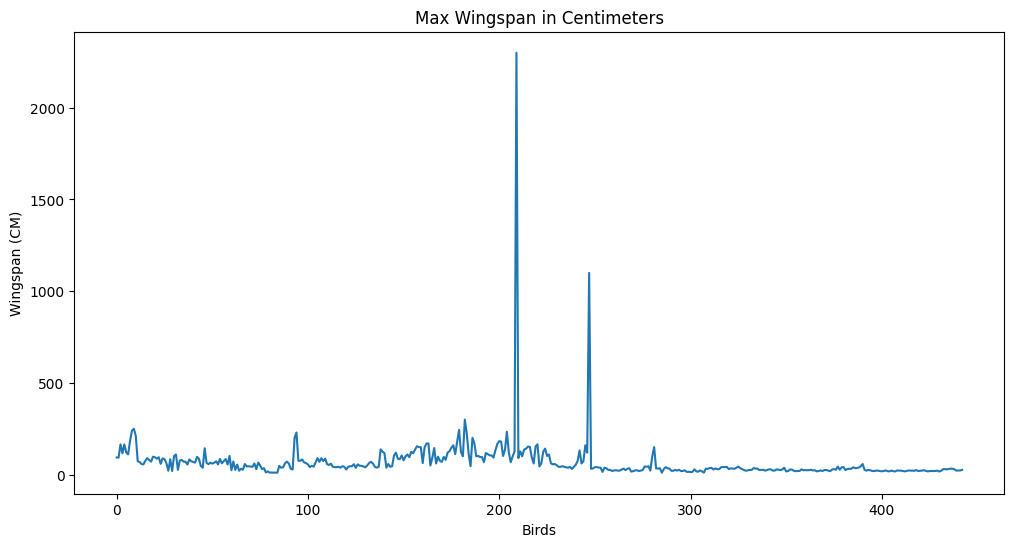

In [34]:
# Visualize birds wingspan
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
wingspan = birds.MaxWingspan 
wingspan.plot()
plt.show()

In [35]:
# Check outliers
birds[birds["MaxWingspan"] > 500]

,Name,ScientificName,Category,Order,Family,Genus,ConservationStatus,MinLength,MaxLength,MinBodyMass,MaxBodyMass,MinWingspan,MaxWingspan
209,Bald eagle,Haliaeetus leucocephalus,Hawks/Eagles,Accipitriformes,Accipitridae,Haliaeetus,LC,70.0,102.0,3000.0,6300.0,1800.0,2300.0
247,Prairie falcon,Falco mexicanus,Falcons /Caracaras,Falconformes,Falconidae,Falco,LC,37.0,45.0,500.0,970.0,1100.0,1100.0


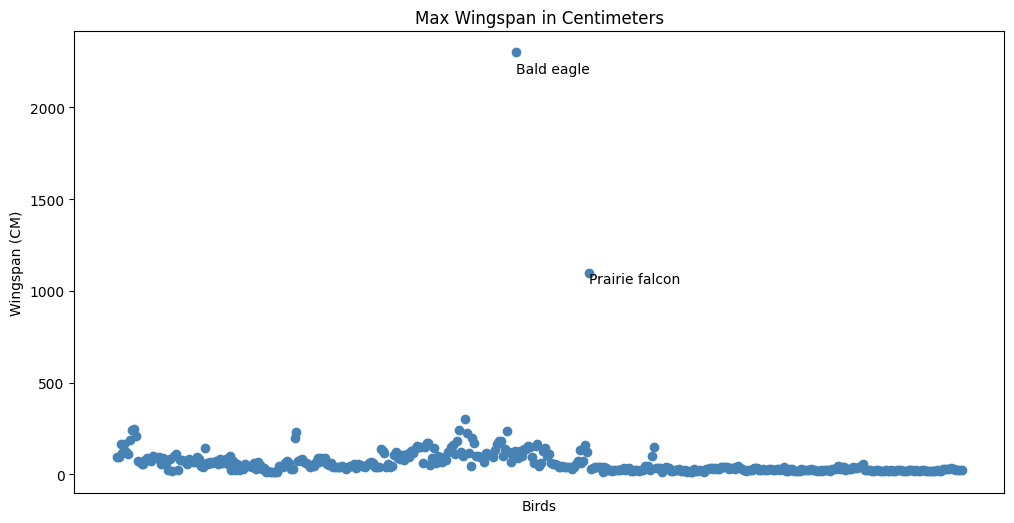

In [36]:
# Label outliers
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    plt.plot(x, y, "o", color="steelblue")
    if birds['MaxWingspan'][i] > 500:
        plt.text(x, y * (1 - 0.05), birds['Name'][i], fontsize=10,)
    
plt.show()

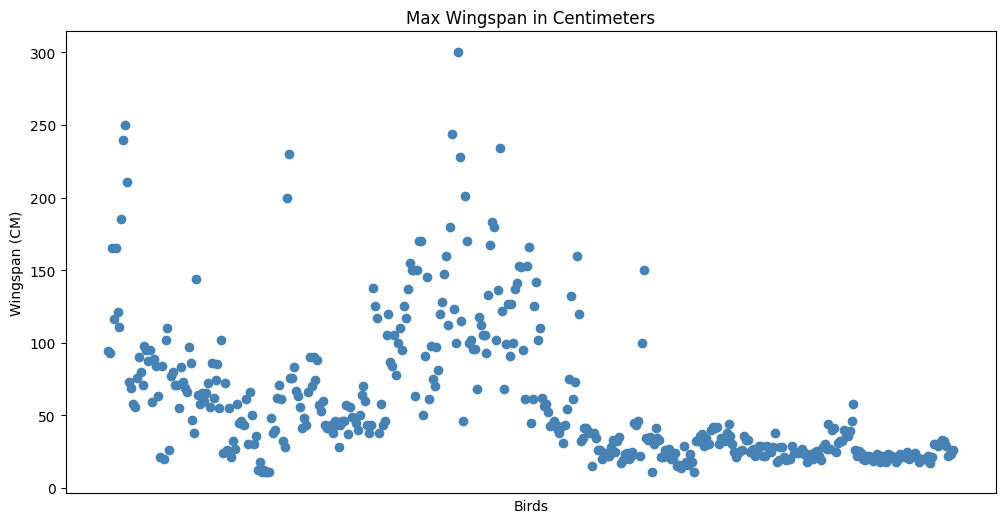

In [37]:
# 1- Remove outliers in plot

plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

for i in range(len(birds)):
    x = birds['Name'][i]
    y = birds['MaxWingspan'][i]
    if birds['Name'][i] not in ['Bald eagle', 'Prairie falcon']:
        plt.plot(x, y, "o", color="steelblue")
plt.show()

In [40]:
# 2- Remove outliers before plot
birds = birds[birds["MaxWingspan"] < 500]

In [41]:
birds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 442
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                441 non-null    object 
 1   ScientificName      441 non-null    object 
 2   Category            441 non-null    object 
 3   Order               441 non-null    object 
 4   Family              441 non-null    object 
 5   Genus               441 non-null    object 
 6   ConservationStatus  441 non-null    object 
 7   MinLength           441 non-null    float64
 8   MaxLength           441 non-null    float64
 9   MinBodyMass         441 non-null    float64
 10  MaxBodyMass         441 non-null    float64
 11  MinWingspan         441 non-null    float64
 12  MaxWingspan         441 non-null    float64
dtypes: float64(6), object(7)
memory usage: 48.2+ KB


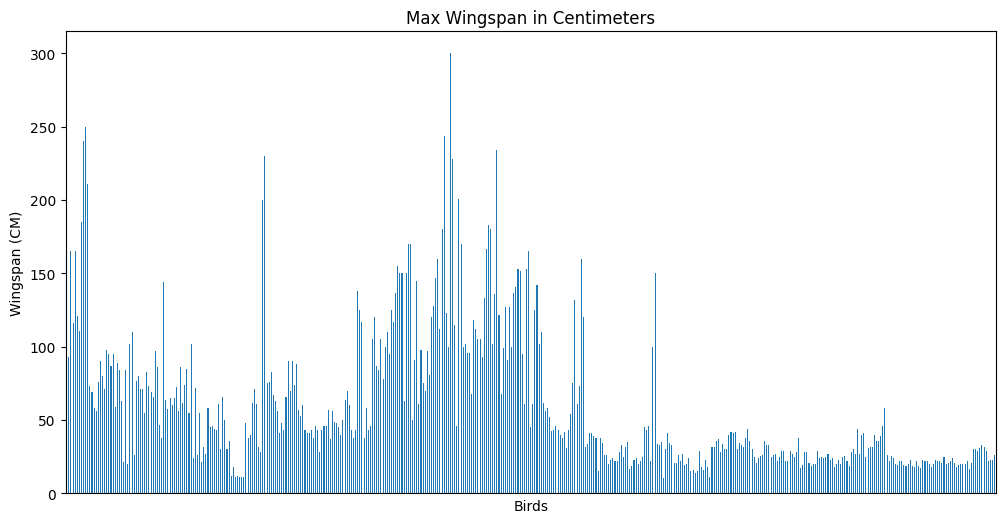

In [56]:
plt.title('Max Wingspan in Centimeters')
plt.ylabel('Wingspan (CM)')
plt.xlabel('Birds')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)
wingspan = birds.MaxWingspan 
wingspan.plot(kind="bar")
plt.show()

In [62]:
# Check other big values
birds[birds["MaxWingspan"] > 200][["Name", "MaxWingspan"]]

,Name,MaxWingspan
8,Mute swan,240.0
9,Trumpeter swan,250.0
10,Tundra swan,211.0
94,Whooping crane,230.0
179,Magnificent frigatebird,244.0
182,American white pelican,300.0
183,Brown pelican,228.0
186,Great blue heron,201.0
204,Golden eagle,234.0


In [63]:
# Check literature to validate info:
# https://en.wikipedia.org/wiki/Great_blue_heron

<Axes: >

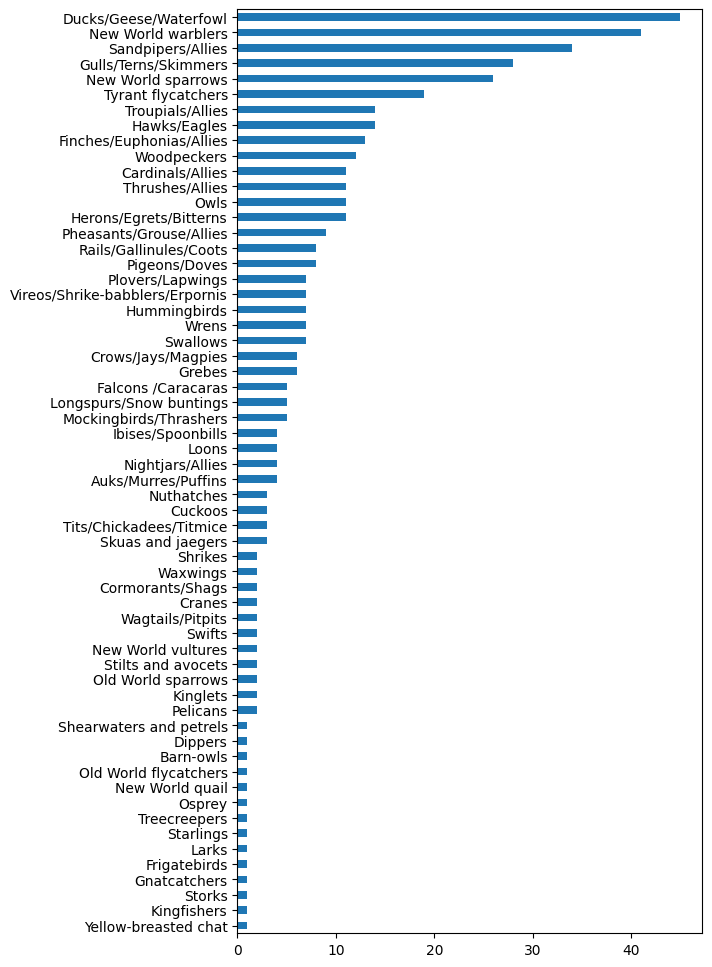

In [78]:
category_count = birds.value_counts(birds['Category'].values, ascending=True)
category_count.plot.barh()